# EDA and wrangling performed on FIFA Dataset

### Importing Files and Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()
%matplotlib inline

In [25]:
#Read Fifa.csv file
data = pd.read_csv('fifa.csv')

In [26]:
#Copy dataframe in df
df = data.copy()

### Some Basic Operations on Data Frame </h3>

In [27]:
#Display the first five rows of the dataframe
df.head()

,id,name,rating,position,height,foot,rare,pace,shooting,passing,dribbling,defending,heading,diving,handling,kicking,reflexes,speed,positioning
0,1001,Gábor Király,69,GK,191,Right,0,,,,,,,70,66,63,74,35,66.0
1,100143,Frederik Boi,65,M,184,Right,0,61,65,63,59,62,62,,,,,,NaN
2,100264,Tomasz Szewczuk,57,A,185,Right,0,65,54,43,53,55,74,,,,,,NaN
3,100325,Steeve Joseph-Reinette,63,D,180,Left,0,68,38,51,46,64,71,,,,,,NaN
4,100326,Kamel Chafni,72,M,181,Right,0,75,64,67,72,57,66,,,,,,NaN


In [28]:
#Display names of the columns in the dataframe
df.columns

Index(['id', ' name', ' rating', ' position', ' height', ' foot', ' rare',
       ' pace', ' shooting', ' passing', ' dribbling', ' defending',
       ' heading', ' diving', ' handling', ' kicking', ' reflexes', ' speed',
       ' positioning'],
      dtype='object')

In [30]:
#Remove extra space in the column names
new_col = ['id','name','rating','position','height','foot','rare','pace','shooting','passing','dribbling','defending','heading','diving','handling','kicking','reflexes','speed','positioning']
df.columns = new_col
df.columns

Index(['id', 'name', 'rating', 'position', 'height', 'foot', 'rare', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'heading', 'diving',
       'handling', 'kicking', 'reflexes', 'speed', 'positioning'],
      dtype='object')

In [31]:
#Check data type of columns
df.dtypes

id               int64
name            object
rating           int64
position        object
height           int64
foot            object
rare             int64
pace            object
shooting        object
passing         object
dribbling       object
defending       object
heading         object
diving          object
handling        object
kicking         object
reflexes        object
speed           object
positioning    float64
dtype: object

In [32]:
#Display the last five rows of dataframe
df.tail()

,id,name,rating,position,height,foot,rare,pace,shooting,passing,dribbling,defending,heading,diving,handling,kicking,reflexes,speed,positioning
8842,9801,Danijel Ljuboja,73,A,189,Left,1,62,73,64,74,56,68,,,,,,NaN
8843,9805,Craig Bellamy,79,A,175,Right,0,80,78,67,81,62,71,,,,,,NaN
8844,9807,Michel Breuer,68,D,183,Right,0,61,40,56,51,70,74,,,,,,NaN
8845,9815,Gill Swerts,65,D,179,Right,0,65,48,63,65,67,69,,,,,,NaN
8846,9913,Mehdi Nafti,69,M,179,Right,0,55,56,64,65,69,60,,,,,,NaN


### Note: The stats for the Goal keeper position are based on certain parameters only which is why the remaining columns are empty. The same applies to the Attack, Mid and Defend positions as well where some columns are redundant and as such are left empty.

In [33]:
#Display the statistical summary for the numerical columns
df.describe()

,id,rating,height,rare,positioning
count,8847.000000,8847.000000,8847.000000,8847.000000,930.000000
mean,152337.538035,66.680457,181.750424,0.353114,64.955914
std,54506.606056,7.146679,6.454356,0.477965,8.854231
min,2.000000,40.000000,158.000000,0.000000,37.000000
25%,140001.500000,62.000000,178.000000,0.000000,59.000000
50%,171578.000000,66.000000,182.000000,0.000000,65.000000
75%,189185.000000,72.000000,186.000000,1.000000,71.000000
max,205583.000000,94.000000,208.000000,1.000000,91.000000


In [34]:
#Display the statistical summary of object type columns in the dataframe
df.describe(include = 'O')

,name,position,foot,pace,shooting,passing,dribbling,defending,heading,diving,handling,kicking,reflexes,speed
count,8847,8847,8847,8847,8847,8847,8847,8847,8847,8847,8847,8847,8847,8847
unique,8678,4,2,73,80,76,76,64,67,49,45,53,53,54
top,Henrique,M,Right,,,,,,,,,,,
freq,5,3041,6762,930,930,930,930,930,930,7917,7917,7917,7917,7917


In [35]:
#Display the statistical summary of all the columns in the dataframe
df.describe(include = 'all')

,id,name,rating,position,height,foot,rare,pace,shooting,passing,dribbling,defending,heading,diving,handling,kicking,reflexes,speed,positioning
count,8847.000000,8847,8847.000000,8847,8847.000000,8847,8847.000000,8847,8847,8847,8847,8847,8847,8847,8847,8847,8847,8847,930.000000
unique,NaN,8678,NaN,4,NaN,2,NaN,73,80,76,76,64,67,49,45,53,53,54,NaN
top,NaN,Henrique,NaN,M,NaN,Right,NaN,,,,,,,,,,,,NaN
freq,NaN,5,NaN,3041,NaN,6762,NaN,930,930,930,930,930,930,7917,7917,7917,7917,7917,NaN
mean,152337.538035,NaN,66.680457,NaN,181.750424,NaN,0.353114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.955914
std,54506.606056,NaN,7.146679,NaN,6.454356,NaN,0.477965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.854231
min,2.000000,NaN,40.000000,NaN,158.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.000000
25%,140001.500000,NaN,62.000000,NaN,178.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000
50%,171578.000000,NaN,66.000000,NaN,182.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.000000
75%,189185.000000,NaN,72.000000,NaN,186.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.000000


### Dealing with Missing Values 

In [36]:
#Check the dataframe for null values
df.isnull().sum()

id                0
name              0
rating            0
position          0
height            0
foot              0
rare              0
pace              0
shooting          0
passing           0
dribbling         0
defending         0
heading           0
diving            0
handling          0
kicking           0
reflexes          0
speed             0
positioning    7917
dtype: int64

In [37]:
#Replace extra spaces with NaN
df = df.replace('^\s*$', np.NaN, regex = True)
df.head()

,id,name,rating,position,height,foot,rare,pace,shooting,passing,dribbling,defending,heading,diving,handling,kicking,reflexes,speed,positioning
0,1001,Gábor Király,69,GK,191,Right,0,NaN,NaN,NaN,NaN,NaN,NaN,70,66,63,74,35,66.0
1,100143,Frederik Boi,65,M,184,Right,0,61,65,63,59,62,62,NaN,NaN,NaN,NaN,NaN,NaN
2,100264,Tomasz Szewczuk,57,A,185,Right,0,65,54,43,53,55,74,NaN,NaN,NaN,NaN,NaN,NaN
3,100325,Steeve Joseph-Reinette,63,D,180,Left,0,68,38,51,46,64,71,NaN,NaN,NaN,NaN,NaN,NaN
4,100326,Kamel Chafni,72,M,181,Right,0,75,64,67,72,57,66,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#Fill all null values of dataframe with 0
df.fillna(0, inplace = True)
df

,id,name,rating,position,height,foot,rare,pace,shooting,passing,dribbling,defending,heading,diving,handling,kicking,reflexes,speed,positioning
0,1001,Gábor Király,69,GK,191,Right,0,0,0,0,0,0,0,70,66,63,74,35,66.0
1,100143,Frederik Boi,65,M,184,Right,0,61,65,63,59,62,62,0,0,0,0,0,0.0
2,100264,Tomasz Szewczuk,57,A,185,Right,0,65,54,43,53,55,74,0,0,0,0,0,0.0
3,100325,Steeve Joseph-Reinette,63,D,180,Left,0,68,38,51,46,64,71,0,0,0,0,0,0.0
4,100326,Kamel Chafni,72,M,181,Right,0,75,64,67,72,57,66,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8842,9801,Danijel Ljuboja,73,A,189,Left,1,62,73,64,74,56,68,0,0,0,0,0,0.0
8843,9805,Craig Bellamy,79,A,175,Right,0,80,78,67,81,62,71,0,0,0,0,0,0.0
8844,9807,Michel Breuer,68,D,183,Right,0,61,40,56,51,70,74,0,0,0,0,0,0.0
8845,9815,Gill Swerts,65,D,179,Right,0,65,48,63,65,67,69,0,0,0,0,0,0.0


In [39]:
#Count the number of players in each position
df['position'].value_counts()

 M     3041
 D     2794
 A     2082
 GK     930
Name: position, dtype: int64

In [40]:
#Check datatypes of all columns
df.dtypes

id               int64
name            object
rating           int64
position        object
height           int64
foot            object
rare             int64
pace            object
shooting        object
passing         object
dribbling       object
defending       object
heading         object
diving          object
handling        object
kicking         object
reflexes        object
speed           object
positioning    float64
dtype: object

In [41]:
#Cast ' pace', ' shooting', ' passing', ' dribbling', ' defending',' heading', ' diving', ' handling', ' kicking', ' reflexes', ' speed',' positioning' into Integer type
df[['pace','shooting','passing','dribbling','defending','heading','diving','handling','kicking','reflexes','speed','positioning']] = df[['pace','shooting','passing','dribbling','defending','heading','diving','handling','kicking','reflexes','speed','positioning']].astype(int)
df.dtypes

id              int64
name           object
rating          int64
position       object
height          int64
foot           object
rare            int64
pace            int32
shooting        int32
passing         int32
dribbling       int32
defending       int32
heading         int32
diving          int32
handling        int32
kicking         int32
reflexes        int32
speed           int32
positioning     int32
dtype: object

**Splitting the dataframe into two dataframes, one containing all the features of Goal Keeper and the other containing all other players** 


In [42]:
df_goalkeeper = df[df['position'] == 'GK']
df_goalkeeper.head()

,id,name,rating,position,height,foot,rare,pace,shooting,passing,dribbling,defending,heading,diving,handling,kicking,reflexes,speed,positioning


<span style="color:green">**Note: As you can see, the dataframe is empty and no value has been assigned to it. Let's check out the issue.**</span>

In [43]:
#Check unique value of position, there must be a space on each position
df['position'].unique()

array([' GK', ' M', ' A', ' D'], dtype=object)

<span style="color:green">**From the above output, you can see that there is an extra space in the position reffered to as GK.**</span> 

In [44]:
#Remove extra space in position column and rename it like ' GK' to 'GK'.
df['position'] = df['position'].str.replace(r' ','')
df['position'].unique()

array(['GK', 'M', 'A', 'D'], dtype=object)

In [45]:
#Now make a dataframe of df_goalkeeper.
df_goalkeeper = df[df['position'] == 'GK']
df_goalkeeper.head()

,id,name,rating,position,height,foot,rare,pace,shooting,passing,dribbling,defending,heading,diving,handling,kicking,reflexes,speed,positioning
0,1001,Gábor Király,69,GK,191,Right,0,0,0,0,0,0,0,70,66,63,74,35,66
20,100745,Paul Smith,64,GK,193,Right,1,0,0,0,0,0,0,65,62,55,67,41,62
29,100807,Stefanos Kotsolis,65,GK,190,Right,0,0,0,0,0,0,0,62,68,62,65,60,64
31,100899,Steve Phillips,61,GK,185,Right,1,0,0,0,0,0,0,46,65,76,71,31,61
39,101282,Oka Nikolov,70,GK,188,Right,0,0,0,0,0,0,0,72,64,59,73,61,73


**Note: Dataframe of goal keeper must only contain the following columns 'id', 'name', 'rating', 'position', 'height', 'foot',' rare','diving', 'handling', 'kicking', 'reflexes', 'speed','positioning'** <br>
**Dropping all the other columns**

In [46]:
no_need = ['pace','shooting','passing','dribbling','defending','heading']
for element in no_need:
    df_goalkeeper = df_goalkeeper.drop(element, axis=1)

In [47]:
#Checking the results
df_goalkeeper

,id,name,rating,position,height,foot,rare,diving,handling,kicking,reflexes,speed,positioning
0,1001,Gábor Király,69,GK,191,Right,0,70,66,63,74,35,66
20,100745,Paul Smith,64,GK,193,Right,1,65,62,55,67,41,62
29,100807,Stefanos Kotsolis,65,GK,190,Right,0,62,68,62,65,60,64
31,100899,Steve Phillips,61,GK,185,Right,1,46,65,76,71,31,61
39,101282,Oka Nikolov,70,GK,188,Right,0,72,64,59,73,61,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8799,806,Mathias Schober,69,GK,191,Left,0,71,73,64,68,47,70
8806,8247,Palop,77,GK,184,Right,0,78,79,79,71,54,81
8827,8910,Carlo Nash,63,GK,182,Right,1,60,66,60,63,45,64
8828,899,Frank Rost,74,GK,194,Right,1,72,74,70,75,32,80


**Now make a dataframe of df_players having data of all the other players except the goal keeper.**


In [49]:
df_players = df[df['position'] != 'GK']
df_players

,id,name,rating,position,height,foot,rare,pace,shooting,passing,dribbling,defending,heading,diving,handling,kicking,reflexes,speed,positioning
1,100143,Frederik Boi,65,M,184,Right,0,61,65,63,59,62,62,0,0,0,0,0,0
2,100264,Tomasz Szewczuk,57,A,185,Right,0,65,54,43,53,55,74,0,0,0,0,0,0
3,100325,Steeve Joseph-Reinette,63,D,180,Left,0,68,38,51,46,64,71,0,0,0,0,0,0
4,100326,Kamel Chafni,72,M,181,Right,0,75,64,67,72,57,66,0,0,0,0,0,0
5,100329,Abdoulaye Faye,72,D,187,Right,1,50,37,47,43,76,82,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8842,9801,Danijel Ljuboja,73,A,189,Left,1,62,73,64,74,56,68,0,0,0,0,0,0
8843,9805,Craig Bellamy,79,A,175,Right,0,80,78,67,81,62,71,0,0,0,0,0,0
8844,9807,Michel Breuer,68,D,183,Right,0,61,40,56,51,70,74,0,0,0,0,0,0
8845,9815,Gill Swerts,65,D,179,Right,0,65,48,63,65,67,69,0,0,0,0,0,0


**Note: Dataframe of other players must contain the following columns 'id', 'name', 'rating', 'position', 'height', 'foot', 'rare',  'pace', 'shooting', 'passing', 'dribbling', 'defending', 'heading'** <br>
**Dropping all the other columns**

In [50]:
no_need2 = ['diving','handling','kicking','reflexes','speed','positioning']
for element2 in no_need2:
    df_players = df_players.drop(element2, axis=1)

In [51]:
#Checking the results
df_players

,id,name,rating,position,height,foot,rare,pace,shooting,passing,dribbling,defending,heading
1,100143,Frederik Boi,65,M,184,Right,0,61,65,63,59,62,62
2,100264,Tomasz Szewczuk,57,A,185,Right,0,65,54,43,53,55,74
3,100325,Steeve Joseph-Reinette,63,D,180,Left,0,68,38,51,46,64,71
4,100326,Kamel Chafni,72,M,181,Right,0,75,64,67,72,57,66
5,100329,Abdoulaye Faye,72,D,187,Right,1,50,37,47,43,76,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8842,9801,Danijel Ljuboja,73,A,189,Left,1,62,73,64,74,56,68
8843,9805,Craig Bellamy,79,A,175,Right,0,80,78,67,81,62,71
8844,9807,Michel Breuer,68,D,183,Right,0,61,40,56,51,70,74
8845,9815,Gill Swerts,65,D,179,Right,0,65,48,63,65,67,69


### Check shape of both the dataframes

In [52]:
df_goalkeeper.shape

(930, 13)

In [53]:
df_players.shape

(7917, 13)

### Check head of both the dataframes

In [54]:
df_goalkeeper.head()

,id,name,rating,position,height,foot,rare,diving,handling,kicking,reflexes,speed,positioning
0,1001,Gábor Király,69,GK,191,Right,0,70,66,63,74,35,66
20,100745,Paul Smith,64,GK,193,Right,1,65,62,55,67,41,62
29,100807,Stefanos Kotsolis,65,GK,190,Right,0,62,68,62,65,60,64
31,100899,Steve Phillips,61,GK,185,Right,1,46,65,76,71,31,61
39,101282,Oka Nikolov,70,GK,188,Right,0,72,64,59,73,61,73


In [55]:
df_players.head()

,id,name,rating,position,height,foot,rare,pace,shooting,passing,dribbling,defending,heading
1,100143,Frederik Boi,65,M,184,Right,0,61,65,63,59,62,62
2,100264,Tomasz Szewczuk,57,A,185,Right,0,65,54,43,53,55,74
3,100325,Steeve Joseph-Reinette,63,D,180,Left,0,68,38,51,46,64,71
4,100326,Kamel Chafni,72,M,181,Right,0,75,64,67,72,57,66
5,100329,Abdoulaye Faye,72,D,187,Right,1,50,37,47,43,76,82


### Check the summary stats of both dataframes

In [56]:
df_goalkeeper.describe()

,id,rating,height,rare,diving,handling,kicking,reflexes,speed,positioning
count,930.000000,930.00000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000
mean,144009.048387,65.91828,188.233333,0.345161,67.351613,64.739785,63.067742,68.865591,48.212903,64.955914
std,58295.056991,7.67349,4.701690,0.475677,8.311224,8.073867,8.653150,8.546599,10.330171,8.854231
min,6.000000,40.00000,173.000000,0.000000,30.000000,39.000000,30.000000,32.000000,14.000000,37.000000
25%,134631.750000,61.00000,185.000000,0.000000,62.000000,60.000000,57.000000,63.000000,42.000000,59.000000
50%,163614.500000,66.00000,188.000000,0.000000,67.000000,65.000000,63.000000,69.000000,50.000000,65.000000
75%,186381.750000,71.00000,191.000000,1.000000,73.000000,70.000000,69.000000,74.000000,56.000000,71.000000
max,205409.000000,89.00000,208.000000,1.000000,91.000000,86.000000,94.000000,93.000000,73.000000,91.000000


### Note: Statistically speaking, the data appears to be relatively symmetric.

In [57]:
df_players.describe()

,id,rating,height,rare,pace,shooting,passing,dribbling,defending,heading
count,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000
mean,153315.875205,66.769989,180.988885,0.354048,67.934066,55.054440,58.845522,61.193887,60.339523,63.743337
std,53963.758068,7.077355,6.200081,0.478254,11.169316,13.136116,10.962049,12.255261,10.622997,8.982680
min,2.000000,41.000000,158.000000,0.000000,24.000000,12.000000,13.000000,19.000000,26.000000,22.000000
25%,141099.000000,62.000000,177.000000,0.000000,62.000000,47.000000,52.000000,54.000000,52.000000,58.000000
50%,172252.000000,66.000000,181.000000,0.000000,69.000000,57.000000,60.000000,63.000000,61.000000,64.000000
75%,189390.000000,72.000000,185.000000,1.000000,75.000000,65.000000,66.000000,70.000000,68.000000,70.000000
max,205583.000000,94.000000,203.000000,1.000000,96.000000,90.000000,92.000000,97.000000,89.000000,91.000000


### Note: This dataset also appears to be relatively symmetric.

### Group By and Pivoting 

In [58]:
#Display averages of each columns according the players' positions
df.groupby('position').mean()

,id,rating,height,rare,pace,shooting,passing,dribbling,defending,heading,diving,handling,kicking,reflexes,speed,positioning
position,,,,,,,,,,,,,,,,
A,157071.437080,67.260807,180.938521,0.475024,72.488473,63.759846,54.357349,66.664265,50.905860,64.756484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
D,150820.398712,66.059055,183.145669,0.270938,63.930923,43.618110,55.465283,51.836793,68.069435,66.837867,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GK,144009.048387,65.918280,188.233333,0.345161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.351613,64.739785,63.067742,68.865591,48.212903,64.955914
M,153037.440973,67.087142,179.041763,0.347583,68.493916,59.601776,65.024005,66.045709,59.696153,60.206511,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [59]:
#Count number of players against each position and foot used by them.
df.groupby(['position','foot']).count()

id  name  rating  height  rare  pace  shooting  passing  \
position foot                                                                
A         Left    368   368     368     368   368   368       368      368   
          Right  1714  1714    1714    1714  1714  1714      1714     1714   
D         Left    915   915     915     915   915   915       915      915   
          Right  1879  1879    1879    1879  1879  1879      1879     1879   
GK        Left     98    98      98      98    98    98        98       98   
          Right   832   832     832     832   832   832       832      832   
M         Left    704   704     704     704   704   704       704      704   
          Right  2337  2337    2337    2337  2337  2337      2337     2337   

                 dribbling  defending  heading  diving  handling  kicking  \
position foot                                                               
A         Left         368        368      368     368       368      368   
          Right       1714       1714     1714    1714      1714     1714   
D         Left         915        915      915     915       915      915   
          Right       1879       1879     1879    1879      1879     1879   
GK        Left          98         98       98      98        98       98   
          Right        832        832      832     832       832      832   
M         Left         704        704      704     704       704      704   
          Right       2337       2337     2337    2337      2337     2337   

                 reflexes  speed  positioning  
position foot                                  
A         Left        368    368          368  
          Right      1714   1714         1714  
D         Left        915    915          915  
          Right      1879   1879         1879  
GK        Left         98     98           98  
          Right       832    832          832  
M         Left        704    704          704  
          Right      2337   2337         2337

In [60]:
#Perform grouping on position and foot to find mean, min and max values of rating. Store the result in a variable called 'a'.
a = df.groupby(['position','foot']).agg({'rating':['min','mean','max']}).reset_index()
a

position    foot rating               
                      min       mean max
0        A    Left     51  67.758152  94
1        A   Right     41  67.154026  92
2        D    Left     47  65.931148  85
3        D   Right     42  66.121341  89
4       GK    Left     52  68.102041  89
5       GK   Right     40  65.661058  86
6        M    Left     43  67.778409  90
7        M   Right     41  66.878905  92

**Perform "PIVOTING" on the dataframe 'df'. The properties should be as follows:**<br>
*index = ' position'<br>
columns = ' foot'<br>
values=' rating'<br>
aggfunc=['min','mean']*<br>

In [61]:
piv = pd.pivot_table(df, index='position', columns='foot', values='rating',aggfunc=['min','mean'])
piv

min              mean           
foot      Left  Right       Left      Right
position                                   
A           51     41  67.758152  67.154026
D           47     42  65.931148  66.121341
GK          52     40  68.102041  65.661058
M           43     41  67.778409  66.878905

# Visualization

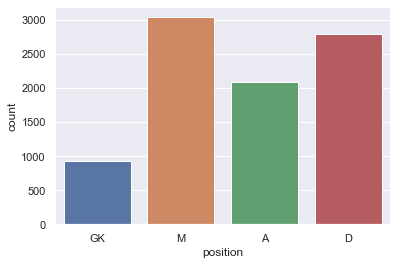

In [62]:
#Display total players of each position
sns.countplot(x='position',data=df);

### Note: The number of players in the four positions in decreasing order are:
                    1. Midfielder (Highest number of players)
                    2. Defender (2nd highest number of players)
                    3. Attacker (3rd highest number of players)
                    4. Goal keeper(lowest number of players)

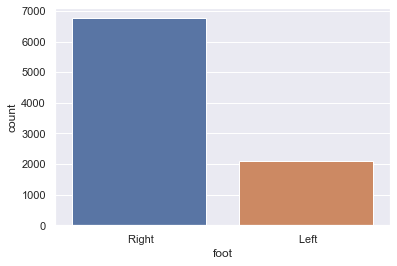

In [63]:
#Display the total number of players for each foot type
sns.countplot(x='foot',data=df);

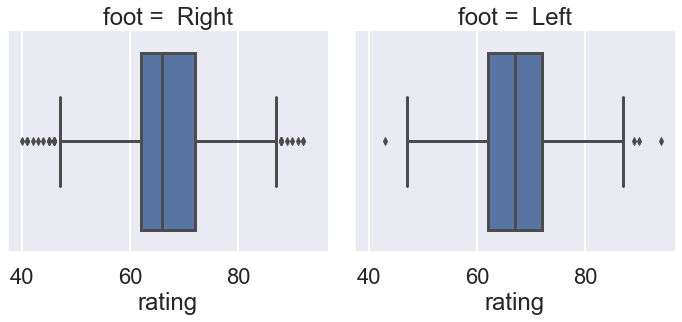

In [64]:
#Display 'foot' distribution per 'rating' using boxplot
sns.set_context('poster')
sns.catplot(kind='box' , x='rating' , col='foot' , data=df);

### Note: For the right foot dataset there are several values which are outliers causing the boxplot to be slightly skewed. Whereas, the left foot dataset contains only a few outlier values due to which the boxplot seems approximately symmetrical.

In [65]:
df['position'].unique()

array(['GK', 'M', 'A', 'D'], dtype=object)

In [66]:
df_M=df[df['position']=='M']
df_A=df[df['position']=='A']
df_D=df[df['position']=='D']

Text(0.5, 1.0, 'Attacker')

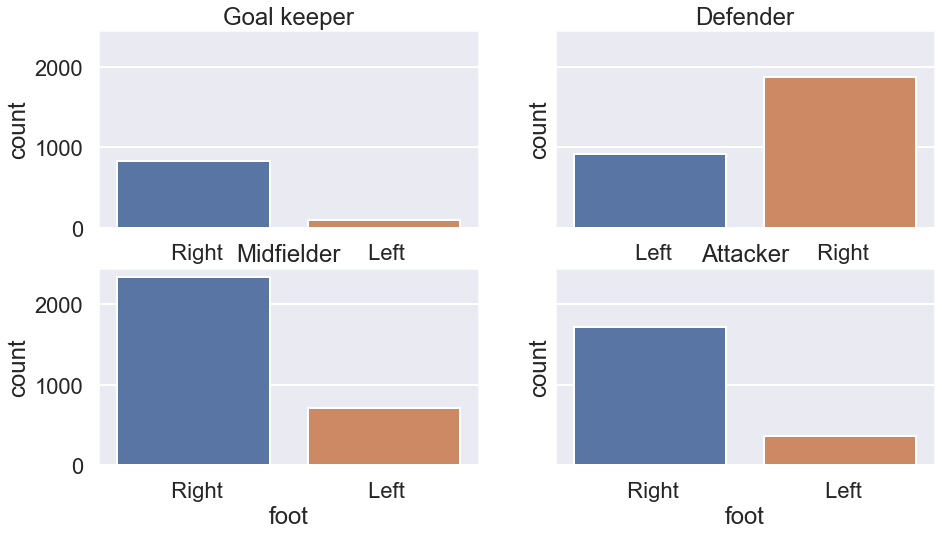

In [67]:
#Display total number of players for each foot type according to their positions as subplots.
fig, ax=plt.subplots(2,2,sharey=True, figsize=(15,8))
sns.countplot(x='foot', data=df_goalkeeper, ax=ax[0,0])
ax[0,0].set_title('Goal keeper')
sns.countplot(x='foot', data=df_D, ax=ax[0,1])
ax[0,1].set_title('Defender')
sns.countplot(x='foot', data=df_M, ax=ax[1,0])
ax[1,0].set_title('Midfielder')
sns.countplot(x='foot', data=df_A, ax=ax[1,1])
ax[1,1].set_title('Attacker')

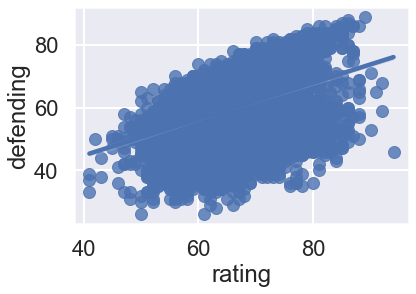

In [68]:
#Using regplot to determine the relationship/correlation of ratings and defending of players.
sns.regplot(x='rating', y='defending', data=df_players);

### Note: The above graph shows that the relationship between the rating and defending is linear or directly proportional. However, the graph shows that a large number of outlier values are present due to which the data might be skewed.

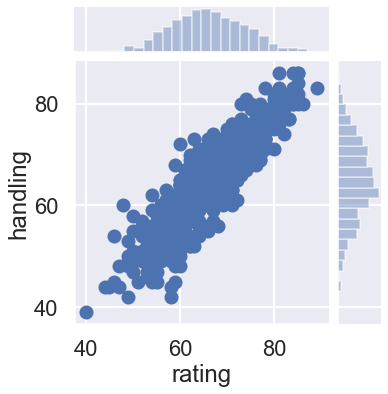

In [69]:
#Using jointplot to plot a graph showing the relationship/correlation of rating and handling of goalkeeper as well as their distributions alongside the graph.
sns.jointplot(x='rating', y='handling', data=df_goalkeeper);

In [70]:
#Find the correlation among all the columns of the goalkeeper dataframe
df_goalkeeper.corr()

,id,rating,height,rare,diving,handling,kicking,reflexes,speed,positioning
id,1.000000,-0.355814,0.000388,-0.135258,-0.257888,-0.349666,-0.264304,-0.232939,0.003586,-0.418950
rating,-0.355814,1.000000,0.099763,0.231273,0.920651,0.896627,0.702664,0.893557,0.214803,0.900010
height,0.000388,0.099763,1.000000,0.046735,0.091859,0.112361,0.086684,0.056339,-0.021480,0.084102
rare,-0.135258,0.231273,0.046735,1.000000,0.195529,0.230818,0.262367,0.216361,0.004306,0.199900
diving,-0.257888,0.920651,0.091859,0.195529,1.000000,0.742630,0.619452,0.858516,0.235284,0.740798
handling,-0.349666,0.896627,0.112361,0.230818,0.742630,1.000000,0.675943,0.697350,0.142400,0.845211
kicking,-0.264304,0.702664,0.086684,0.262367,0.619452,0.675943,1.000000,0.555723,0.129424,0.637982
reflexes,-0.232939,0.893557,0.056339,0.216361,0.858516,0.697350,0.555723,1.000000,0.237122,0.701991
speed,0.003586,0.214803,-0.021480,0.004306,0.235284,0.142400,0.129424,0.237122,1.000000,0.103384
positioning,-0.418950,0.900010,0.084102,0.199900,0.740798,0.845211,0.637982,0.701991,0.103384,1.000000


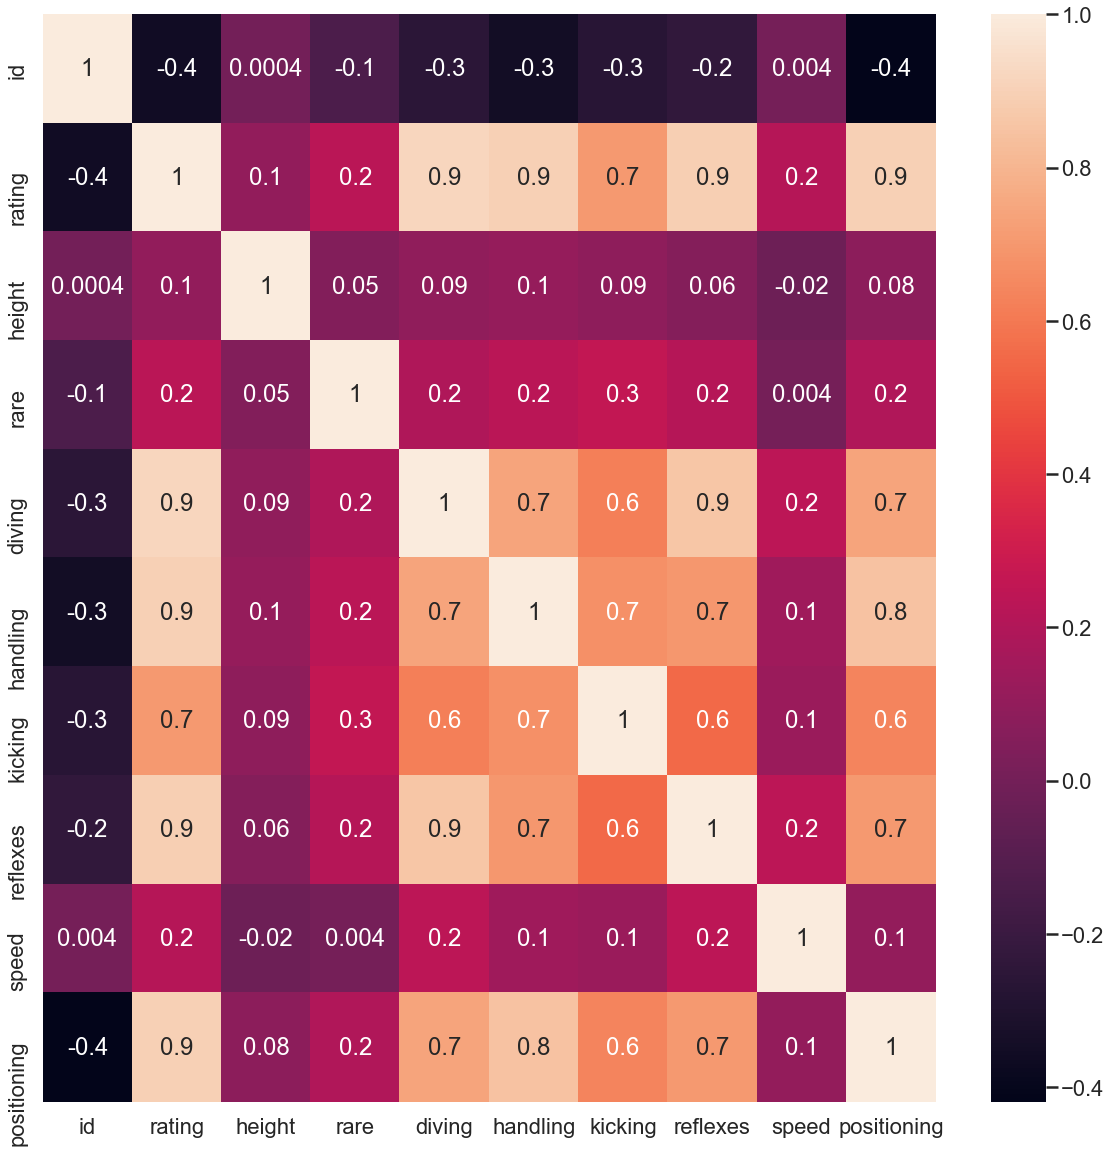

In [77]:
#Make a heatmap of the acquired results
plt.figure(figsize=(20,20))
sns.heatmap(df_goalkeeper.corr(), annot=True, fmt='.1g');

### Note: The columns 'rating', 'height', 'rare', 'diving', 'handling', 'kicking', 'reflexes', 'speed' and 'positioning' are important to determine a Goal keeper's rating. This is because the correlation coefficient shows a positive value meaning they have a linear relationship.

In [78]:
#Find the correlation among all the columns of the players dataframe
df_players.corr()

,id,rating,height,rare,pace,shooting,passing,dribbling,defending,heading
id,1.000000,-0.254920,-0.016548,-0.040907,0.253182,-0.128368,-0.177869,-0.032934,-0.221930,-0.194803
rating,-0.254920,1.000000,-0.002019,0.251950,0.265640,0.541683,0.633406,0.539971,0.387013,0.439104
height,-0.016548,-0.002019,1.000000,-0.023979,-0.392051,-0.219175,-0.273012,-0.401063,0.356490,0.367099
rare,-0.040907,0.251950,-0.023979,1.000000,0.276355,0.244903,0.126480,0.227765,-0.057604,0.051384
pace,0.253182,0.265640,-0.392051,0.276355,1.000000,0.360584,0.260352,0.573711,-0.291526,-0.113837
shooting,-0.128368,0.541683,-0.219175,0.244903,0.360584,1.000000,0.558012,0.783148,-0.239953,0.031571
passing,-0.177869,0.633406,-0.273012,0.126480,0.260352,0.558012,1.000000,0.656681,0.228389,0.005945
dribbling,-0.032934,0.539971,-0.401063,0.227765,0.573711,0.783148,0.656681,1.000000,-0.266005,-0.110206
defending,-0.221930,0.387013,0.356490,-0.057604,-0.291526,-0.239953,0.228389,-0.266005,1.000000,0.543090
heading,-0.194803,0.439104,0.367099,0.051384,-0.113837,0.031571,0.005945,-0.110206,0.543090,1.000000


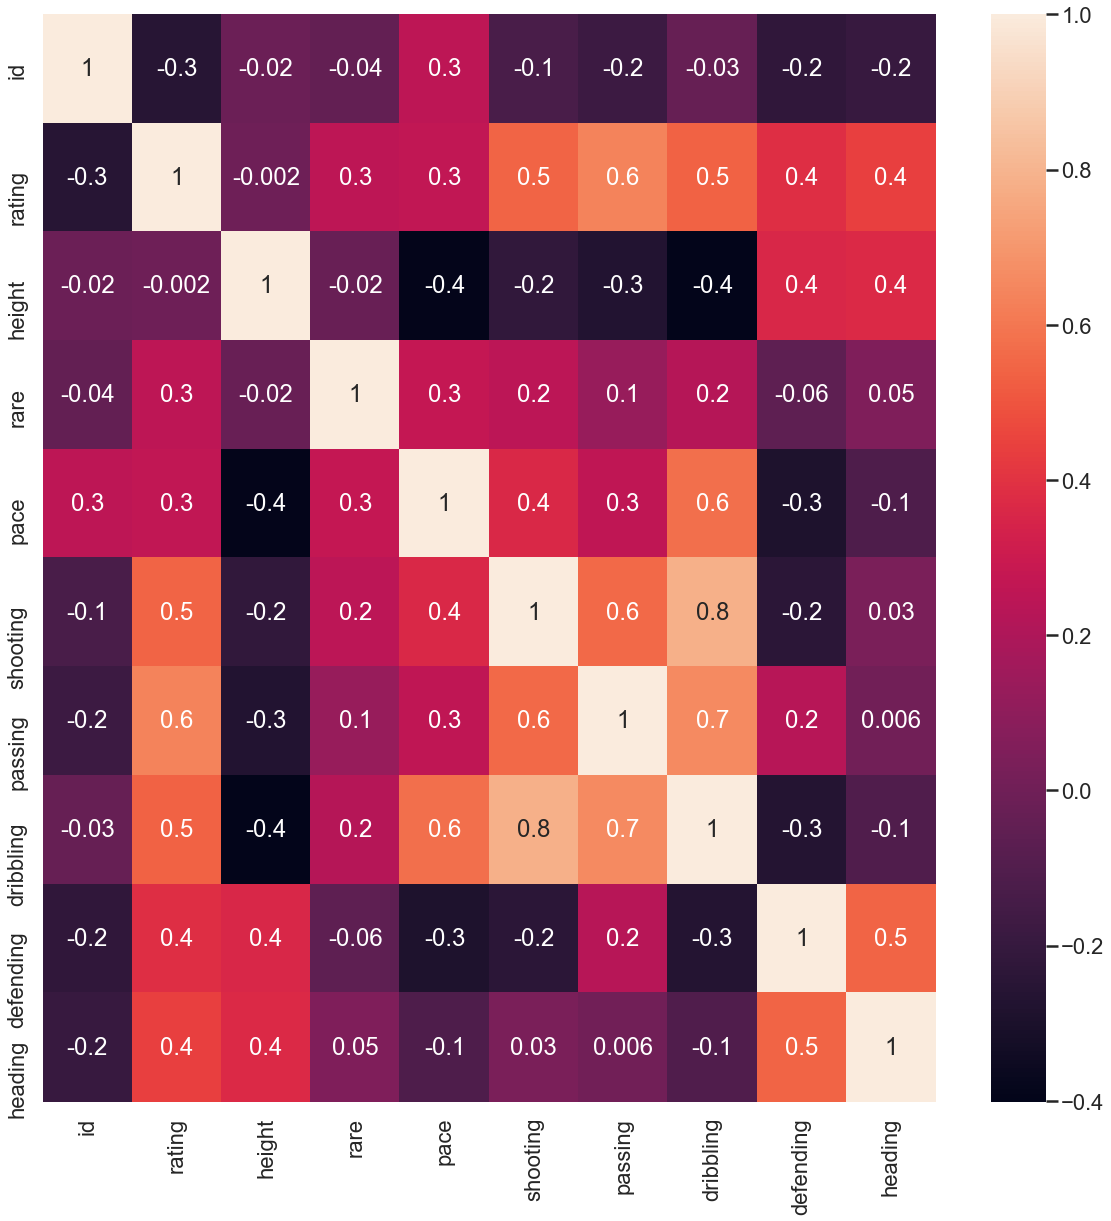

In [81]:
#Make a heatmap of the acquired results
plt.figure(figsize=(20,20))
sns.heatmap(df_players.corr(), annot=True, fmt='.1g');

### Note: The columns 'rating', 'rare', 'pace', 'shooting', 'passing', 'dribbling', 'defending' and 'heading' are important to determine rating for other players. This is because the correlation coefficient shows a positive value meaning they have a linear relationship.

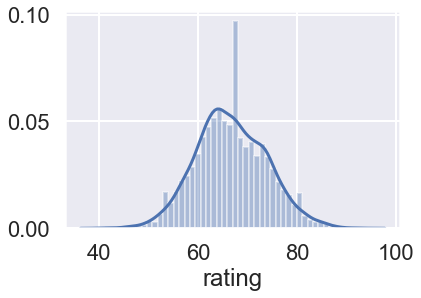

In [82]:
#Using distplot to show the distribution of rating
sns.distplot(df['rating']);

### Note: The distribution is slightly right skewed due to the presence of outliers.

### Display the distribution of ratings of each types of players using distplot() and applying KDE

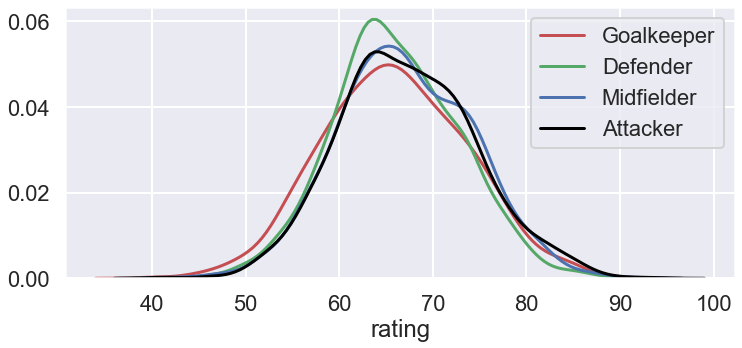

In [87]:
plt.figure(figsize=(12,5))
ax = sns.distplot(df_goalkeeper['rating'], kde=True, color='r', label='Goalkeeper', hist=False)
ax = sns.distplot(df_D['rating'], kde=True, color='g', label='Defender', hist=False)
ax = sns.distplot(df_M['rating'], kde=True, color='b', label='Midfielder', hist=False)
ax = sns.distplot(df_A['rating'], kde=True, color='black', label='Attacker', hist=False)

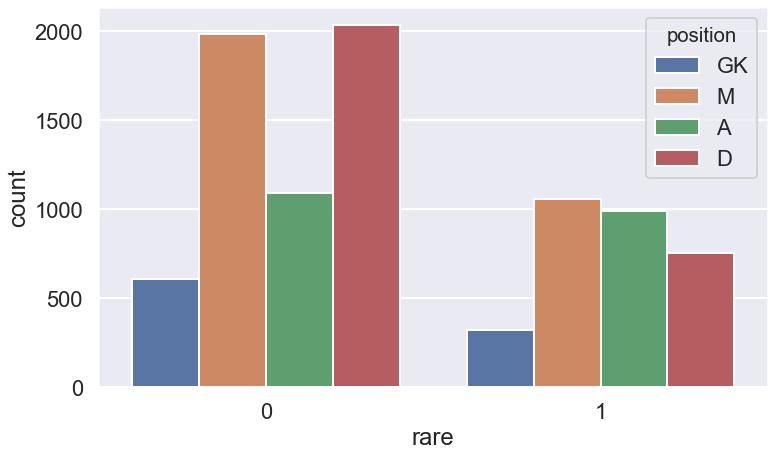

In [91]:
#Display the count of rare players in each type of postion
plt.figure(figsize=(12,7))
sns.countplot(x='rare', hue='position', data=df);